<a href="https://colab.research.google.com/github/kallemmanisha/SCT_TrackCode_TaskNumber/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

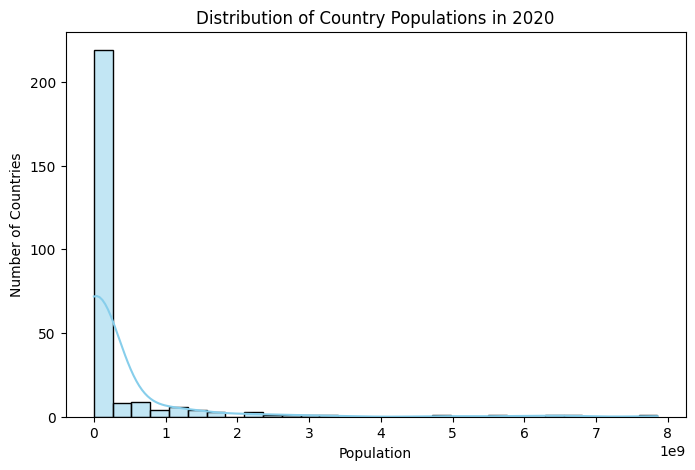

/tmp/ipython-input-3011256619.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Population", y="Country Name", data=top10_2020, palette="viridis")


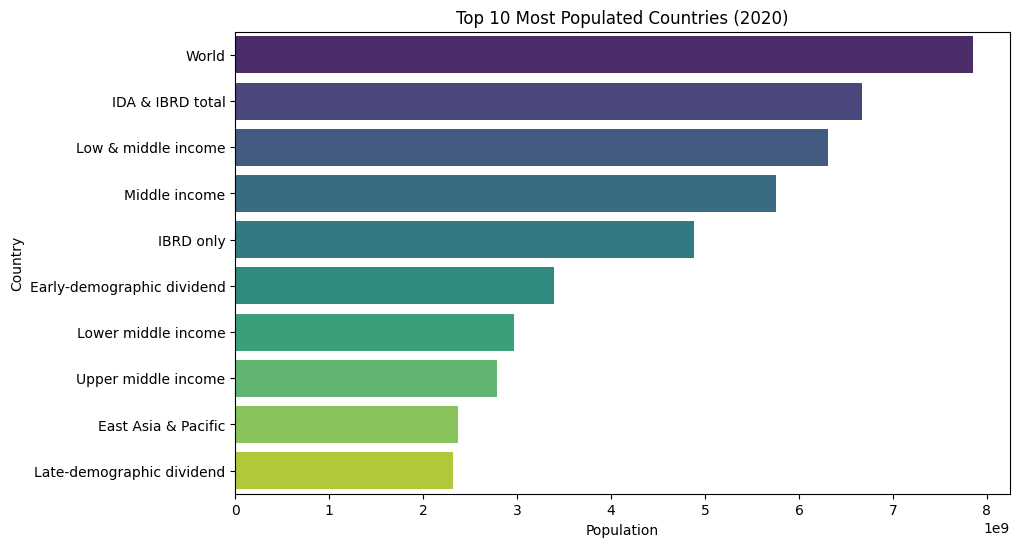

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Skip metadata rows (first 4)
data = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_581007.csv", skiprows=4)


#  Reshape the data

# Convert from wide format (years as columns) to long format
data_melted = data.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Population"
)

# Drop missing values and fix datatypes
data_melted = data_melted.dropna(subset=["Population"])
data_melted["Year"] = data_melted["Year"].astype(int)


# Histogram

pop_2020 = data_melted[data_melted["Year"] == 2020]

plt.figure(figsize=(8,5))
sns.histplot(pop_2020["Population"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Country Populations in 2020")
plt.xlabel("Population")
plt.ylabel("Number of Countries")
plt.show()

top10_2020 = pop_2020.sort_values(by="Population", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Population", y="Country Name", data=top10_2020, palette="viridis")
plt.title("Top 10 Most Populated Countries (2020)")
plt.xlabel("Population")
plt.ylabel("Country")
plt.show()